In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [ ]:
(X_train,Y_train), (X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(Y_test)

10000

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

4

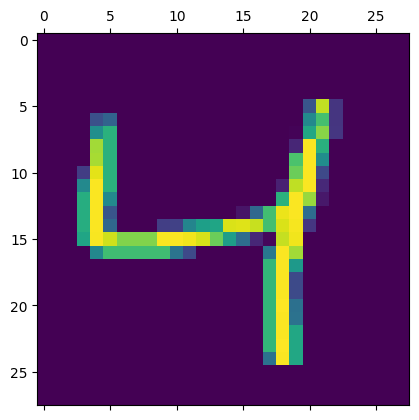

In [ ]:
plt.matshow(X_train[2])
Y_train[2]

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flatten.shape

(60000, 784)

Making a simple neural network with 1 layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )
model.fit(X_train_flatten,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4690 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9261


In [ ]:
model.evaluate(X_test_flatten, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2688 - accuracy: 0.9244


[0.26877361536026, 0.9243999719619751]

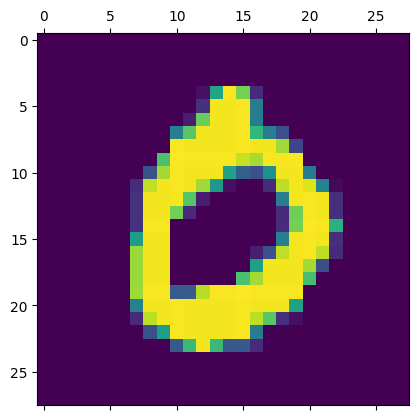

In [ ]:
plt.matshow(X_test[3])

In [ ]:
y_predict = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_predict[1000]

array([1.9180028e-05, 3.7401842e-03, 4.2366845e-04, 9.0799403e-01,
       1.0767413e-01, 5.2077943e-03, 6.5789227e-06, 9.4884056e-01,
       7.3204145e-02, 9.8609060e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[3])

0

In [ ]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels = Y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    5,    8,    2,    3,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    9,  911,   20,    7,    4,   13,   11,   48,    5],
       [   1,    0,   14,  927,    0,   18,    2,   11,   29,    8],
       [   1,    1,    3,    2,  900,    0,   13,    5,   11,   46],
       [   9,    3,    3,   35,   10,  758,   13,    9,   44,    8],
       [   8,    3,    6,    1,    7,   11,  915,    2,    5,    0],
       [   1,    5,   21,    4,    4,    0,    0,  956,    3,   34],
       [   4,    5,    6,   17,    9,   16,    8,   13,  889,    7],
       [   9,    5,    2,    9,   18,    5,    0,   29,   10,  922]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

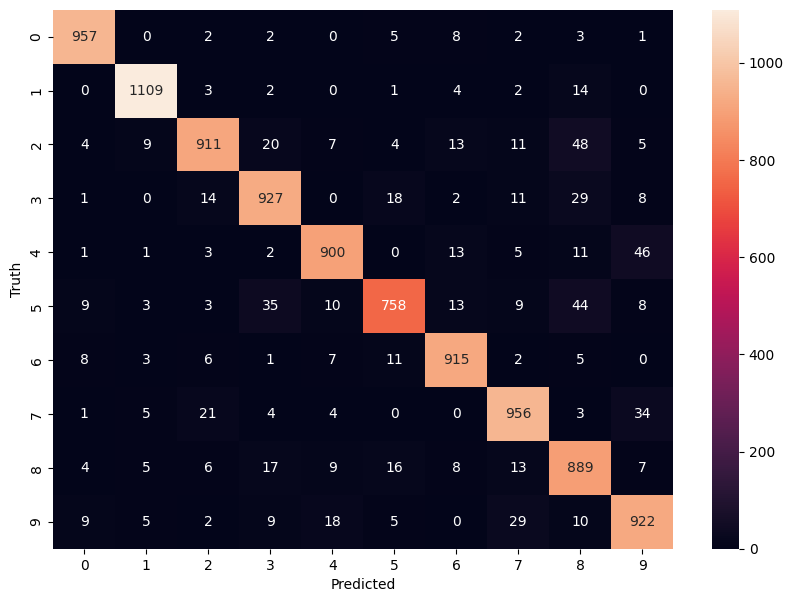

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Making a neural network with Hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )
model.fit(X_train_flatten,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2674 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1217 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0859 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9845


In [ ]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0954 - accuracy: 0.9708


[0.09536156803369522, 0.97079998254776]

In [ ]:
y_predict1 = model.predict(X_test_flatten)

313/313 [==============================] - 1s 4ms/step


In [ ]:
np.argmax(y_predict1[100])

6

In [ ]:
y_predict1_labels = [np.argmax(i) for i in y_predict1]

In [ ]:
cm1 = tf.math.confusion_matrix(labels = Y_test,predictions=y_predict1_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    0,    0,    1,    2,    1,    2,    2],
       [   0, 1124,    4,    0,    0,    1,    1,    0,    5,    0],
       [   8,    1, 1000,    0,    4,    0,    2,    5,   10,    2],
       [   4,    1,   14,  948,    2,    8,    0,    6,    8,   19],
       [   2,    0,    1,    0,  949,    0,    3,    1,    0,   26],
       [   2,    0,    0,    7,    1,  858,    5,    2,   11,    6],
       [   9,    3,    1,    1,    3,    2,  936,    0,    3,    0],
       [   3,    3,   13,    0,    4,    0,    0,  984,    3,   18],
       [   8,    0,    5,    1,    3,    2,    1,    4,  942,    8],
       [   4,    3,    0,    0,    4,    0,    0,    2,    0,  996]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

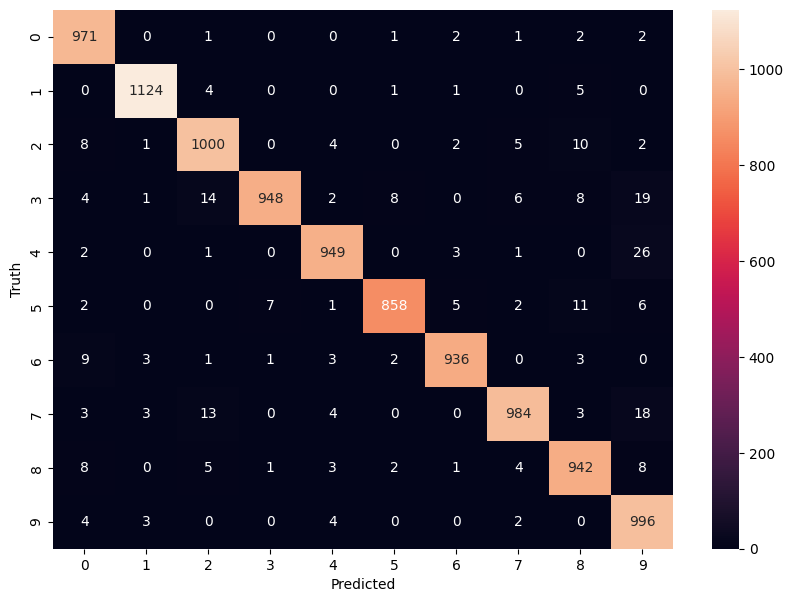

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Making it using Flatten Layer

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )
model.fit(X_train,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2698 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1263 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0676 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9840


In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9760


[0.08111037313938141, 0.9760000109672546]